## Dependencies


In [8]:
# %pip install -q tf_keras
# %pip install opencv-contrib-python

     --------------------------------------- 45.3/45.3 MB 22.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\PC\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



## Import Library


In [2]:
from deepface import DeepFace

import cv2
import matplotlib.pyplot as plt

## Custom Class


In [31]:
class facial_area():
    def __init__(self, tar=None):
        if (tar == None):
            self.x = 0
            self.y = 0
            self.width = 0
            self.height = 0
        else:
            self.set(tar)

    def set(self, tar):
        self.x = tar["x"]
        self.y = tar["y"]
        self.width = tar["w"]
        self.height = tar["h"]
        
    def show_result(self, img, with_size=False):
        img = cv2.rectangle(img, (self.x, self.y), (self.x + self.width, self.y + self.height), (0, 255, 0), 2)
        if with_size:
            cv2.putText(img, f"({self.width},{self.height})", (self.x, self.y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

class facial_similarity_checker():
    def __init__(self):
        self.img1 = None
        self.img2 = None
        self.img1_area = facial_area()
        self.img2_area = facial_area()
    
    def load_image(self, img1, img2):
        self.img1 = img1
        self.img2 = img2
    
    def check_similarity(self, img1=None, img2=None):
        if img1 == None or img2 == None:
            img1 = self.img1
            img2 = self.img2
        else:
            self.load_image(img1, img2)

        try :
            img1 = cv2.imread(img1)
            img2 = cv2.imread(img2)
        except:
            print("The image path is not correct")
            return -1

        result = DeepFace.verify(img1, img2)
        self.img1_area.set(result["facial_areas"]["img1"])
        self.img2_area.set(result["facial_areas"]["img2"])

        return result["distance"]

    def show_image(self, img):
        img = cv2.imread(img)
        if (self.img1 == img):
            self.img1_area.show_result(img, with_size=True)
        else:
            self.img2_area.show_result(img, with_size=True)
            
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()

    def show_result(self):
        result = self.check_similarity(self.img1, self.img2)
        print("The similarity between the images is: ", result)
        self.show_image(self.img1)
        self.show_image(self.img2)

## Implementation


The similarity between the images is:  0.3841660238520118


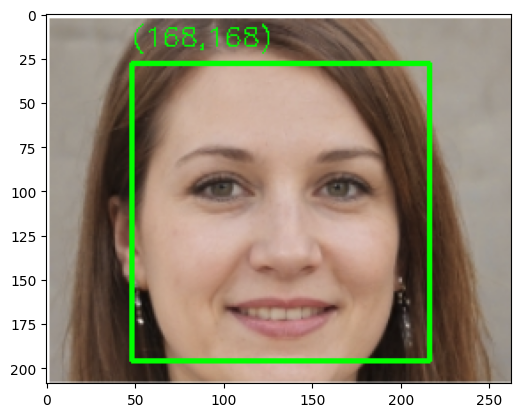

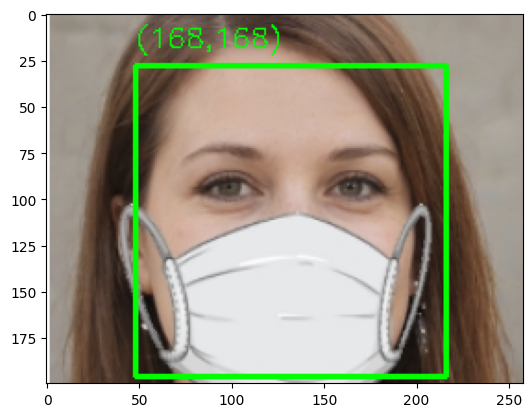

In [32]:
checker = facial_similarity_checker()

img1_path = "img/image1.png"
img2_path = "img/image2.png"

checker.load_image(img1_path, img2_path)
checker.show_result()
